# PP2 - Parte 1

## Import das bibliotecas

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Import do arquivo a ser usado

In [2]:
dados_brutos = np.fromfile('./dataAll.txt')


## Organização dos dados

In [3]:
dados = dados_brutos.reshape((1000,3))
dados = dados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


## Inicialização dos pesos aleatórios

In [4]:
# Distribuição uniforme aleatório dos pesos,
# 3 pesos, entre -0.5 e 0.5
pesos = np.random.uniform(-0.5, 0.5, 3)

print("Pesos iniciais: ", pesos)

Pesos iniciais:  [ 0.39486207  0.28218972 -0.39516789]


## Função de ativação

In [5]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
    if saida >= 0:
        return 1
    else:
        return 0
        

## Principal - Aprendizado

In [6]:
res_temp = 0                  # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(1000)  # Vetor que será comparado com o resultado

n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste
fa = 0              # Funcao de ativacao

#Ele só para quando o vetor de respostas for igual ao vetor final
while(True):

    print("Epoca ", epoca+1, ": ")
    for i in range(1000):

        vetor_res_temp = (x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2])

        fa = funcao_ativacao(vetor_res_temp)

        vetor_final[i] = fa

        if (fa != vetor_resposta[i]): #Se estiver errado

            #Erro é (esperado - funcao ativacao)
            erro = vetor_resposta[i] - fa

            valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
            #Ajuste de peso
            pesos = pesos + (n*erro*valor_anterior)
            mudanca_peso += 1

            #Print vetor de pesos, exerc 5
            print(pesos)

    epoca += 1

    #Print dos pesos da época
    print("Época ", epoca, ": ", mudanca_peso, " pesos mudados")
    mudanca_total += mudanca_peso
    mudanca_peso = 0

    if((vetor_resposta == vetor_final).all()):
        break



print("convergiu!")
# Se for true, quer dizer que os dois são iguais, chegou a uma convergência
print((vetor_resposta == vetor_final).all())


Epoca  1 : 
[ 0.29486207 82.88088972 79.46066211]
[  0.19486207 135.46941972 -19.20839789]
[  0.29486207  95.46050972 -97.10108789]
[  0.39486207 144.92132972 -48.20703789]
[   0.49486207  105.37207972 -145.30107789]
[  0.59486207 197.61405972 -58.82850789]
[  0.69486207 185.71694972 -86.72804789]
[   0.79486207  157.50948972 -120.31216789]
[   0.69486207   92.81622972 -201.68329789]
[   0.79486207  131.19051972 -182.41929789]
[   0.89486207  201.38425972 -115.19361789]
[   0.79486207  137.09504972 -183.25824789]
[   0.89486207  202.08620972 -122.36656789]
[   0.79486207  151.15262972 -185.76653789]
[   0.69486207  227.13594972 -121.58686789]
[   0.59486207  163.02618972 -209.93256789]
[   0.69486207  250.16094972 -123.24273789]
[   0.79486207  198.24561972 -179.44375789]
[   0.69486207  115.75286972 -270.17820789]
[   0.79486207  194.65665972 -228.52931789]
[   0.69486207  284.36545972 -149.52059789]
[   0.59486207  241.85622972 -226.76424789]
[   0.49486207  175.18139972 -296.6595778

## Calculo da função da reta

In [7]:
# Encontrar função da reta
#y = a - b*x
#a = w0/w2
#b = w1/w2
funcao_a = pesos[0]/pesos[2]
funcao_b = pesos[1]/pesos[2]

x = np.arange(-1000,1000)

y = funcao_a - funcao_b * x

print("funcao: y=", funcao_a, "-", funcao_b, "*x")


funcao: y= 0.00037075602848599094 - -0.9990550123389121 *x


## Plot do gráfico e print dos ajustes e épocas totais

Total de ajustes de peso:  162
Total de épocas:  9


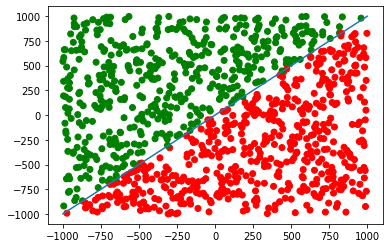

In [8]:
# Plot da reta e dos pares

cor = np.where(vetor_resposta == 0, "green", "red")

print("Total de ajustes de peso: ", mudanca_total)
print("Total de épocas: ", epoca)

plt.scatter(vetor1,vetor2, c=cor)
plt.plot(x, y)